In [2]:
import os
os.getcwd()
from infrastructure import *
import datasets
import matplotlib.pyplot as plt

In [3]:
torch.cuda.is_available()

True

In [4]:
# test
model_wrapped = EncoderWrapper(device="cuda")
test_dataset_xor = datasets.load_dataset("data_scripts/data_xor.py", add_sep=False)["train"]
# test_dataloader = DataLoader(test_dataset_xor, batch_size=3)

# print(next(iter(test_dataloader)))
# output = model_wrapped(next(iter(test_dataloader))["content"])
# print(len(output))
# print(output[0].size())


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Found cached dataset data_xor (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '94cf5ce42ff0bce06b5e2f35e6e8523a60f5c6d178b69ed00ac7a5c9bf26e72b', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts

  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
ic.disable()
outs = get_hidden_states_many_examples(model_wrapped, test_dataset_xor, n=4, batch_size=2)
print(len(outs[0]))
print(outs[0][0].size())

13
torch.Size([4, 768])



# The XOR experiment

We have negated and non-negated versions of the same propositions in LAMA

- A: Einstein was born in Austria
- A': Eisntein was not born in Austria

We make the following combinations
- AA
- AA'
- A'A
- A'A'

We classify contradictory statements together and non-contradictory statements together

The point is to ask if a linear regression can seperate out this classification, the point is to look if the model is doing compositionality.


In [6]:
ic.disable()
model_wrapped = EncoderWrapper(device="cuda")
train_dataset_xor = datasets.load_dataset("data_scripts/data_xor.py")["train"]
test_dataset_xor = datasets.load_dataset("data_scripts/data_xor.py")["test"]
dev_dataset_xor = datasets.load_dataset("data_scripts/data_xor.py")["validation"]


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Found cached dataset data_xor (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '94cf5ce42ff0bce06b5e2f35e6e8523a60f5c6d178b69ed00ac7a5c9bf26e72b', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts

  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset data_xor (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '94cf5ce42ff0bce06b5e2f35e6e8523a60f5c6d178b69ed00ac7a5c9bf26e72b', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts'}/data_xor/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset data_xor (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '94cf5ce42ff0bce06b5e2f35e6e8523a60f5c6d178b69ed00ac7a5c9bf26e72b', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts'}/data_xor/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
train, train_labels = get_hidden_states_many_examples(model_wrapped, train_dataset_xor, n=1000, batch_size=100)


In [8]:
test, test_labels = get_hidden_states_many_examples(model_wrapped, test_dataset_xor, n=10000, batch_size=100)


In [9]:
ic(len(test_labels))
ic(test_labels.size())
ic(train_labels.size())

torch.Size([1000])

In [10]:
models_xor, accuracies = run_experiment_across_layers(linear_probe_experiment, train, train_labels, test, test_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D+02    |proj g|=  1.11340D+00

At iterate   50    f=  6.91900D+02    |proj g|=  1.85126D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     71     82      1     0     0   3.806D-02   6.919D+02
  F =   691.89912765519728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 v

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished



At iterate  100    f=  6.65203D+02    |proj g|=  6.51545D-01

At iterate  150    f=  6.65174D+02    |proj g|=  2.82383D+00

At iterate  200    f=  6.65172D+02    |proj g|=  5.22742D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    240    285      1     0     0   1.880D-01   6.652D+02
  F =   665.17140280947876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D+02    |proj g|=  2.87322D+00

At iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  150    f=  5.61899D+02    |proj g|=  1.37876D+00

At iterate  200    f=  5.61890D+02    |proj g|=  7.63472D-02

At iterate  250    f=  5.61888D+02    |proj g|=  5.30670D-01

At iterate  300    f=  5.61886D+02    |proj g|=  1.17826D+00

At iterate  350    f=  5.61880D+02    |proj g|=  1.56643D+00

At iterate  400    f=  5.61844D+02    |proj g|=  1.52887D+00

At iterate  450    f=  5.61790D+02    |proj g|=  7.78471D-01

At iterate  500    f=  5.61772D+02    |proj g|=  1.92186D-01

At iterate  550    f=  5.61769D+02    |proj g|=  1.69875D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    563    685   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  150    f=  4.06980D+02    |proj g|=  1.03377D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    191    224      1     0     0   7.455D-02   4.070D+02
  F =   406.98005122307222     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D+02    |proj g|=  1.49880D+01

At iterate   50    f=  2.61258D+02    |proj g|=  3.56980D-01

At iterate  100    f=  2.61016D+02    |proj g|=  1.13121D+00

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  100    f=  1.90887D+02    |proj g|=  9.84338D-02

At iterate  150    f=  1.90867D+02    |proj g|=  2.02226D-01

At iterate  200    f=  1.90865D+02    |proj g|=  1.23988D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    202    240      1     0     0   8.431D-02   1.909D+02
  F =   190.86542618110295     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D+02    |proj g|=  3.86882D+01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  300    f=  1.22837D+02    |proj g|=  4.88664D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    301    366      1     0     0   3.932D-02   1.228D+02
  F =   122.83675207683130     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D+02    |proj g|=  3.54189D+01

At iterate   50    f=  1.18006D+02    |proj g|=  9.50622D-02

At iterate  100    f=  1.18003D+02    |proj g|=  2.23796D-02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  250    f=  1.17922D+02    |proj g|=  2.40017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    299    350      1     0     0   1.990D-02   1.179D+02
  F =   117.92119611495674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D+02    |proj g|=  4.41962D+01

At iterate   50    f=  1.37028D+02    |proj g|=  6.99149D+00

At iterate  100    f=  1.36590D+02    |proj g|=  2.65563D-01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  200    f=  1.36567D+02    |proj g|=  9.06837D-01

At iterate  250    f=  1.36373D+02    |proj g|=  5.16785D-01

At iterate  300    f=  1.36218D+02    |proj g|=  2.62811D+00

At iterate  350    f=  1.36189D+02    |proj g|=  1.58962D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    386    460      1     0     0   6.832D-03   1.362D+02
  F =   136.18856403540377     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  1.44481D+02    |proj g|=  2.85321D-01

At iterate  100    f=  1.44464D+02    |proj g|=  5.20256D-01

At iterate  150    f=  1.44462D+02    |proj g|=  7.46024D-01

At iterate  200    f=  1.44421D+02    |proj g|=  2.77242D+00

At iterate  250    f=  1.44358D+02    |proj g|=  1.60669D+00

At iterate  300    f=  1.44348D+02    |proj g|=  7.26789D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    349    412      1     0     0   8.908D-02   1.443D+02
  F =   144.34706238294837     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  250    f=  2.82778D+02    |proj g|=  8.06996D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    274    326      1     0     0   1.292D-02   2.828D+02
  F =   282.77814283924783     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [11]:
reports_xor_no_control = generate_classification_report_all_layers(test, test_labels, models_xor)
class_0_xor, class_1_xor = collect_all_precisions_recalls(reports_xor_no_control)

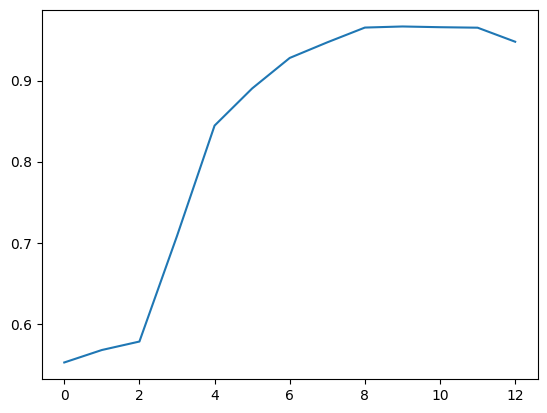

In [12]:
plt.plot( [i for i in range(len(reports_xor_no_control))], [report['accuracy'] for report in reports_xor_no_control],)

## Control Experiment
replace negation with gibberish and run the linear probes for inference

In [13]:

test_dataset_xor_1 = datasets.load_dataset("data_scripts/data_xor.py", task_num=1, cache_dir="control_task")["test"]

Found cached dataset data_xor (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': 'control_task', 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '94cf5ce42ff0bce06b5e2f35e6e8523a60f5c6d178b69ed00ac7a5c9bf26e72b', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'task_num': 1}/data_xor/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
test_control1, test_labels_control1 = get_hidden_states_many_examples(model_wrapped, test_dataset_xor_1, n=10000, batch_size=100)


In [15]:
test_labels_control1

tensor([0, 1, 1,  ..., 1, 1, 0], device='cuda:0')

In [16]:
reports_xor_control_1 = generate_classification_report_all_layers(test_control1, test_labels_control1, models_xor)
class_0_xor_control_1, class_1_xor_control_1 = collect_all_precisions_recalls(reports_xor_control_1)


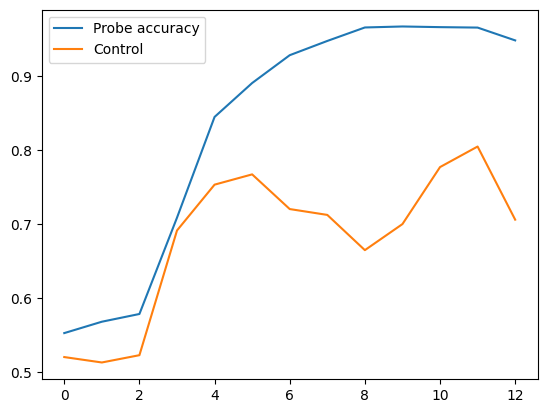

In [17]:
plt.plot( [i for i in range(len(reports_xor_no_control))], [report['accuracy'] for report in reports_xor_no_control], label="Probe accuracy")
plt.plot([i for i in range(len(reports_xor_control_1))], [report['accuracy'] for report in reports_xor_control_1], label="Control")
plt.legend()
plt.savefig("XOR_setup.svg", format="svg")

In [18]:
print(reports_xor_no_control[8])
print(reports_xor_control_1[11])

{'0': {'precision': 0.9545189504373178, 'recall': 0.977313432835821, 'f1-score': 0.9657817109144543, 'support': 3350}, '1': {'precision': 0.9767584097859328, 'recall': 0.9534328358208956, 'f1-score': 0.9649546827794562, 'support': 3350}, 'accuracy': 0.9653731343283583, 'macro avg': {'precision': 0.9656386801116252, 'recall': 0.9653731343283583, 'f1-score': 0.9653681968469552, 'support': 6700}, 'weighted avg': {'precision': 0.9656386801116252, 'recall': 0.9653731343283583, 'f1-score': 0.9653681968469553, 'support': 6700}}
{'0': {'precision': 0.7439024390243902, 'recall': 0.9286567164179105, 'f1-score': 0.8260754115772704, 'support': 3350}, '1': {'precision': 0.9050833995234313, 'recall': 0.6802985074626866, 'f1-score': 0.7767552828902522, 'support': 3350}, 'accuracy': 0.8044776119402985, 'macro avg': {'precision': 0.8244929192739108, 'recall': 0.8044776119402985, 'f1-score': 0.8014153472337613, 'support': 6700}, 'weighted avg': {'precision': 0.8244929192739109, 'recall': 0.8044776119402

In [19]:
import datasets
import os
os.statvfs(datasets.config.HF_DATASETS_CACHE)

os.statvfs_result(f_bsize=1048576, f_frsize=1048576, f_blocks=34191575, f_bfree=8784346, f_bavail=7067914, f_files=549253120, f_ffree=355606529, f_favail=355606529, f_flag=4096, f_namemax=255)

# Negation Detection

Very dumb experiment, checking for negation in the statement (from mean-pooled reps)

In [20]:
train_dataset_neg_detect = datasets.load_dataset("data_scripts/data_detect_neg.py", add_sep=False)["train"]
test_dataset_neg_detect = datasets.load_dataset("data_scripts/data_detect_neg.py", add_sep=False)["test"]
dev_dataset_neg_detect = datasets.load_dataset("data_scripts/data_detect_neg.py", add_sep=False)["validation"]

Found cached dataset data_detect_neg (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '4aef03693e9d9fa5d92d3e2c16f122817ea385655033f1eed7551b5d431b6be5', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'add_sep': False}/data_detect_neg/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset data_detect_neg (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '4aef03693e9d9fa5d92d3e2c16f122817ea385655033f1eed7551b5d431b6be5', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'add_sep': False}/data_detect_neg/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset data_detect_neg (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '4aef03693e9d9fa5d92d3e2c16f122817ea385655033f1eed7551b5d431b6be5', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'add_sep': False}/data_detect_neg/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

In [21]:
train_dataset_neg_detect_control = datasets.load_dataset("data_scripts/data_detect_neg.py",control=1)["train"]
test_dataset_neg_detect_control = datasets.load_dataset("data_scripts/data_detect_neg.py", control=1)["test"]
dev_dataset_neg_detect_control = datasets.load_dataset("data_scripts/data_detect_neg.py", control=1)["validation"]

Found cached dataset data_detect_neg (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '4aef03693e9d9fa5d92d3e2c16f122817ea385655033f1eed7551b5d431b6be5', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'control': 1}/data_detect_neg/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset data_detect_neg (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '4aef03693e9d9fa5d92d3e2c16f122817ea385655033f1eed7551b5d431b6be5', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'control': 1}/data_detect_neg/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset data_detect_neg (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': '4aef03693e9d9fa5d92d3e2c16f122817ea385655033f1eed7551b5d431b6be5', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'control': 1}/data_detect_neg/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

In [22]:
train_detect_neg, train_labels_det_neg = get_hidden_states_many_examples(model_wrapped, train_dataset_neg_detect, n=500, batch_size=100)


In [23]:
test_detect_neg, test_labels_det_neg = get_hidden_states_many_examples(model_wrapped, test_dataset_neg_detect, n=2000, batch_size=100)


In [24]:
test_detect_neg_con, test_labels_det_neg_con = get_hidden_states_many_examples(model_wrapped, test_dataset_neg_detect_control, n=2000, batch_size=100)


In [25]:
models_neg_det, accuracies = run_experiment_across_layers(linear_probe_experiment, train_detect_neg, train_labels_det_neg, test_detect_neg, test_labels_det_neg)
# class_0_neg_det, class_1_neg_det = collect_all_precisions_recalls(reports_neg_det)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46574D+02    |proj g|=  8.44786D+00

At iterate   50    f=  8.84967D+01    |proj g|=  3.60859D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     60     69      1     0     0   9.816D-05   8.850D+01
  F =   88.496679182182973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 v

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  4.53411D+01    |proj g|=  2.37485D-01

At iterate  100    f=  4.53362D+01    |proj g|=  2.69116D-01

At iterate  150    f=  4.52831D+01    |proj g|=  4.67842D-01

At iterate  200    f=  4.52486D+01    |proj g|=  1.30606D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    209    244      1     0     0   2.691D-02   4.525D+01
  F =   45.248580881951739     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    196    231      1     0     0   6.113D-04   3.869D+01
  F =   38.691594026812652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46574D+02    |proj g|=  2.88128D+01

At iterate   50    f=  3.81723D+01    |proj g|=  1.60258D-01

At iterate  100    f=  3.80097D+01    |proj g|=  3.42992D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46574D+02    |proj g|=  2.92555D+01

At iterate   50    f=  3.57445D+01    |proj g|=  2.11324D-01

At iterate  100    f=  3.57384D+01    |proj g|=  2.46547D-02

At iterate  150    f=  3.56476D+01    |proj g|=  3.07260D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    193    235      1     0     0   3.938D-02   3.565D+01
  F =   35.645565623345774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  150    f=  3.56524D+01    |proj g|=  2.10218D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    193    228      1     0     0   9.494D-03   3.565D+01
  F =   35.651419381952856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46574D+02    |proj g|=  2.99981D+01

At iterate   50    f=  3.79998D+01    |proj g|=  5.86586D-01

At iterate  100    f=  3.79581D+01    |proj g|=  2.56425D-02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  100    f=  4.40485D+01    |proj g|=  1.31292D-01

At iterate  150    f=  4.40267D+01    |proj g|=  1.39415D+00

At iterate  200    f=  4.40143D+01    |proj g|=  1.14765D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    217    251      1     0     0   2.691D-02   4.401D+01
  F =   44.014238498307051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46574D+02    |proj g|=  1.67564D+01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [26]:
reports_neg_det = generate_classification_report_all_layers(test_detect_neg, test_labels_det_neg, models_neg_det)


In [27]:
class_0_models_neg_det, class_1_models_neg_det = collect_all_precisions_recalls(reports_neg_det)

In [28]:
reports_neg_det_con = generate_classification_report_all_layers(test_detect_neg_con, test_labels_det_neg_con, models_neg_det)

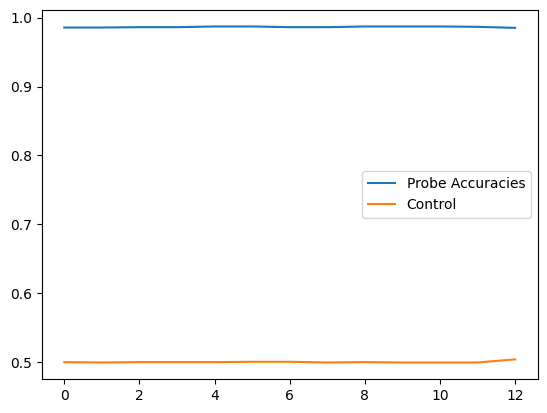

In [29]:
plt.plot([i for i in range(len(reports_neg_det))], [report['accuracy'] for report in reports_neg_det], label="Probe Accuracies")
plt.plot([i for i in range(len(reports_neg_det))], [report['accuracy'] for report in reports_neg_det_con], label="Control")
plt.legend()
plt.savefig("Negation_detect.svg", format="svg")

In [30]:
# class_0_models_neg_det
# class_1_models_neg_det

# Negation Consistency Probe

In [31]:
train_dataset_neg_consistency = datasets.load_dataset("data_scripts/data_negation_consistency.py", add_sep=False)["train"]
test_dataset_neg_consistency = datasets.load_dataset("data_scripts/data_negation_consistency.py", add_sep=False)["test"]
dev_dataset_neg_consistency = datasets.load_dataset("data_scripts/data_negation_consistency.py", add_sep=False)["validation"]

Found cached dataset data_negation_consistency (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': 'b61b143f8583c778d436a1730d12372367c64ff9c71127a6af2f230568607fe8', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'add_sep': False}/data_negation_consistency/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset data_negation_consistency (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': 'b61b143f8583c778d436a1730d12372367c64ff9c71127a6af2f230568607fe8', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'add_sep': False}/data_negation_consistency/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset data_negation_consistency (/home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': 'b61b143f8583c778d436a1730d12372367c64ff9c71127a6af2f230568607fe8', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'add_sep': False}/data_negation_consistency/default/0.0.0)


  0%|          | 0/3 [00:00<?, ?it/s]

In [32]:
train_dataset_neg_consistency_sorted = train_dataset_neg_consistency.sort('label', )
test_dataset_neg_consistency_sorted = test_dataset_neg_consistency.sort('label', )
dev_dataset_neg_consistency_sorted = dev_dataset_neg_consistency.sort('label', )

Loading cached sorted indices for dataset at /home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': 'b61b143f8583c778d436a1730d12372367c64ff9c71127a6af2f230568607fe8', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'add_sep': False}/data_negation_consistency/default/0.0.0/cache-d8b1821e996431b7.arrow
Loading cached sorted indices for dataset at /home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': 'b61b143f8583c778d436a1730d12372367c64ff9c71127a6af2f230568607fe8', 'features': None, 'use_auth_token': None, 'base_path': 'data_scripts', 'add_sep': False}/data_negation_consistency/default/0.0.0/cache-669296e49a91b7cd.arrow
Loading cached sorted indices for dataset at /home2/shashwat.s/main_thread/negation_new/{'cache_dir': None, 'config_name': None, 'data_dir': None, 'data_files': None, 'hash': 'b61b143f8583c778d436a1

In [33]:
train_dataset_neg_consistency_sorted_cut = torch.utils.data.Subset(train_dataset_neg_consistency_sorted, [i for i in range(int(0.16*len(train_dataset_neg_consistency_sorted)), len(train_dataset_neg_consistency_sorted))])
# train_dataset_neg_consistency_sorted_cut['label']
# type(train_dataset_neg_consistency_sorted_cut)

train_dataset_neg_consistency_sorted_cut[0]



{'id_': 2156,
 'subject': 'Different Class',
 'label': 0,
 'masked_non_negated': 'Different Class was written in <mask>.'}

In [34]:
# checking for statistics
# len(train_dataset_neg_consistency_sorted_cut['label'])
total = 0
ones = 0

for entry in train_dataset_neg_consistency_sorted_cut:
    label = entry['label']
    total += 1
    ones += label

print(total)
print(ones)
print(ones/total)

6564
3339
0.5086837294332724


In [35]:
# checking for statistics
len(test_dataset_neg_consistency['label'])
total = 0
ones = 0

for label in test_dataset_neg_consistency['label']:
    total += 1
    ones += label

print(total)
print(ones)
print(ones/total)

1675
721
0.43044776119402983


In [36]:
len(set(train_dataset_neg_consistency['subject']).intersection(set(test_dataset_neg_consistency['subject'])))

133

In [37]:
len(set(test_dataset_neg_consistency['subject']))

1654

In [38]:
train_detect_neg_consistency, train_labels_det_neg_consistency = get_hidden_states_many_examples(model_wrapped, train_dataset_neg_consistency_sorted_cut, n=8000, batch_size=100, query_column="subject")

In [45]:
val_detect_neg_consistency, val_labels_det_neg_consistency = get_hidden_states_many_examples(model_wrapped, dev_dataset_neg_consistency, n=2000, batch_size=100, query_column="subject")

In [39]:
test_detect_neg_consistency, test_labels_det_neg_consistency = get_hidden_states_many_examples(model_wrapped, test_dataset_neg_consistency, n=2000, batch_size=100, query_column="subject")

In [56]:
print(train_detect_neg_consistency[0].size())
print(val_detect_neg_consistency[0].size())

torch.Size([6564, 768])
torch.Size([1674, 768])


In [58]:
train_val_detect_neg_consistency = [torch.cat((train_detect_neg_consistency[i], val_detect_neg_consistency[i]), dim=0) for i in range(len(train_detect_neg_consistency))]
train_val_detect_neg_consistency_label = torch.cat((train_labels_det_neg_consistency, val_labels_det_neg_consistency), dim=0)


In [59]:
print(train_val_detect_neg_consistency[0].size())
print(train_val_detect_neg_consistency_label.size())

torch.Size([8238, 768])
torch.Size([8238])


In [73]:
def mlp_probe_experiment_custom(train_input, test_input, train_labels, test_labels):
    # initialize an mlp probe and run probe experiment
    mlp = MLPClassifier(random_state=1, max_iter=1000, verbose=True, hidden_layer_sizes=(300, 200), early_stopping=True, validation_fraction=0.2)
    print("here")
    return probe_experiment(train_input, test_input, train_labels, test_labels, mlp)


In [74]:
mlps_neg_consistency, accuracies = run_experiment_across_layers(mlp_probe_experiment_custom, train_val_detect_neg_consistency, train_val_detect_neg_consistency_label, test_detect_neg_consistency, test_labels_det_neg_consistency)


here
Iteration 1, loss = 0.66440987
Validation score: 0.597087
Iteration 2, loss = 0.60283062
Validation score: 0.629854
Iteration 3, loss = 0.57180405
Validation score: 0.641383
Iteration 4, loss = 0.52834699
Validation score: 0.651699
Iteration 5, loss = 0.47144437
Validation score: 0.637136
Iteration 6, loss = 0.40435305
Validation score: 0.625000
Iteration 7, loss = 0.32172038
Validation score: 0.625607
Iteration 8, loss = 0.24874503
Validation score: 0.633495
Iteration 9, loss = 0.16454664
Validation score: 0.640170
Iteration 10, loss = 0.15205773
Validation score: 0.620146
Iteration 11, loss = 0.13279510
Validation score: 0.628641
Iteration 12, loss = 0.09415461
Validation score: 0.632282
Iteration 13, loss = 0.08582100
Validation score: 0.626820
Iteration 14, loss = 0.08400399
Validation score: 0.628641
Iteration 15, loss = 0.07970272
Validation score: 0.627427
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
here
Iteration 1, loss = 0

In [75]:
reports_neg_consistency = generate_classification_report_all_layers(test_detect_neg_consistency, test_labels_det_neg_consistency, mlps_neg_consistency)
class_0_neg_con, class_1_neg_con = collect_all_precisions_recalls(reports_neg_consistency)

In [42]:
# class_1_neg_con

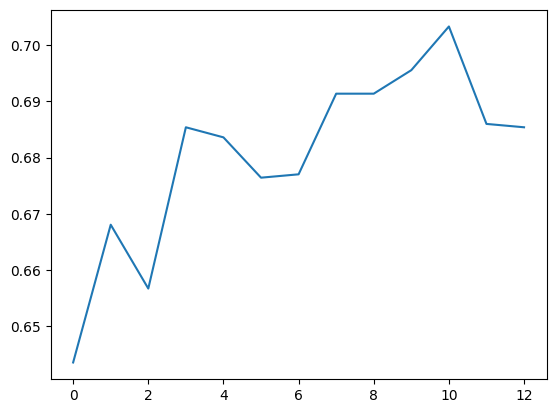

In [76]:
plt.plot([i for i in range(len(reports_neg_consistency))], [report['accuracy'] for report in reports_neg_consistency], label="Accuracy")

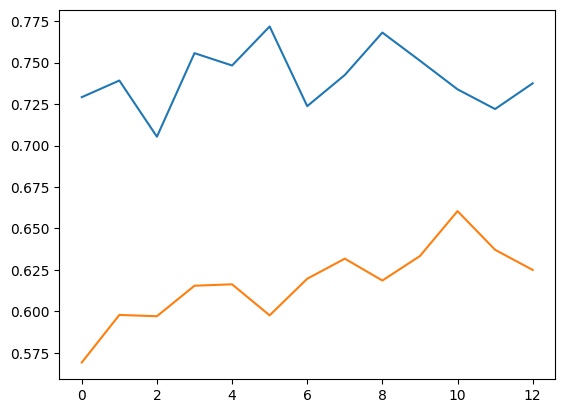

In [78]:
plt.plot([i for i in range(len(reports_neg_consistency))], [class_0_neg_con[i]['precision'] for i in range(len(class_0_neg_con))])
plt.plot([i for i in range(len(reports_neg_consistency))], [class_1_neg_con[i]['precision'] for i in range(len(class_1_neg_con))])

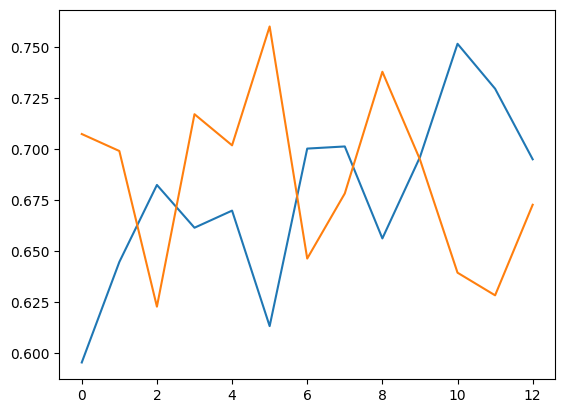

In [79]:
plt.plot([i for i in range(len(reports_neg_consistency))], [class_0_neg_con[i]['recall'] for i in range(len(class_0_neg_con))])
plt.plot([i for i in range(len(reports_neg_consistency))], [class_1_neg_con[i]['recall'] for i in range(len(class_1_neg_con))])

In [ ]:
test_dataset_neg_consistency["masked_non_negated"][:5000]

['Piero Gobetti used to communicate in <mask>.',
 'The original language of Thulladha Manamum Thullum is <mask>.',
 'Fiat Siena is produced by <mask>.',
 'ferric phosphate consists of <mask>.',
 'Carlos Fuentes used to communicate in <mask>.',
 'National Assembly of Hungary is a legal term in <mask>.',
 'Dennistoun Glacier is located in <mask>.',
 'Sasha Krasny died in the city of <mask>.',
 'Pakistan shares border with <mask>.',
 'Dream with Me was written in <mask>.',
 'Hamilton Central railway station is named after <mask>.',
 'West Royalty, Prince Edward Island is located in <mask>.',
 'Dyfed Archaeological Trust works in the field of <mask>.',
 'Florian Henckel von Donnersmarck used to communicate in <mask>.',
 'Edmund Hobhouse was born in the city of <mask>.',
 'The official language of Idaho is <mask>.',
 'Sir Thomas Buxton, 1st Baronet used to work in <mask>.',
 'Pro-feminism is part of <mask>.',
 'Yotam Halperin used to communicate in <mask>.',
 'Newfoundland expedition is loc

In [ ]:
train_dataset_neg_detect["content"][:5000]


['Library of Alexandria',
 'Bruno Racine',
 'Salimuzzaman Siddiqui',
 "Kay O'Brien",
 'Antim Peak',
 'Adobe Media Player',
 'Cauchy stress tensor',
 'Raymond Queneau',
 'Sweden',
 'Chrysler K platform',
 'El Siglo Futuro',
 'Johan Gustaf Sandberg',
 'Fiat Uno',
 'Louisiana Voodoo',
 'Jean-Baptiste Henri Lacordaire',
 'aerial photography',
 'Chrysalis',
 'Charles Augustin Sainte-Beuve',
 'Super Monaco GP',
 'Abraham Blooteling',
 'Edward Bulwer-Lytton',
 "Pourvu qu'elles soient douces",
 'The Bill Cosby Show',
 'Pauline Mills McGibbon',
 'Maryland General Assembly',
 'Average Joe',
 'Singapore International Film Festival',
 'Munich Re',
 'Delhi Technological University',
 'Ukrainian Railways',
 'President of Vietnam',
 'BBC Persian Television',
 'Mishor Rohoshyo',
 'Super Monaco GP',
 'Western Canada Concept',
 'Sardinian Judicati',
 'Sony Crackle',
 'Christian Wilhelm Blomstrand',
 'Florence Regional Airport',
 'Little Child',
 'nickel silver',
 'Jan van Krimpen',
 'Uppslagsverket Finl

## Negation consistency given entire sentence

In [81]:
train_detect_neg_consistency_ful, train_labels_det_neg_consistency = get_hidden_states_many_examples(model_wrapped, train_dataset_neg_consistency, n=8000, batch_size=100, query_column="masked_non_negated")


In [82]:
test_detect_neg_consistency_ful, test_labels_det_neg_consistency = get_hidden_states_many_examples(model_wrapped, test_dataset_neg_consistency, n=2000, batch_size=100, query_column="masked_non_negated")


In [83]:
mlps_neg_con_full, accuracies = run_experiment_across_layers(mlp_probe_experiment_custom, train_detect_neg_consistency_ful, train_labels_det_neg_consistency, test_detect_neg_consistency_ful, test_labels_det_neg_consistency)



here
Iteration 1, loss = 0.58776600
Validation score: 0.744722
Iteration 2, loss = 0.48535702
Validation score: 0.760717
Iteration 3, loss = 0.46410270
Validation score: 0.769034
Iteration 4, loss = 0.44033065
Validation score: 0.773512
Iteration 5, loss = 0.42087397
Validation score: 0.773512
Iteration 6, loss = 0.40615514
Validation score: 0.738964
Iteration 7, loss = 0.38580219
Validation score: 0.772233
Iteration 8, loss = 0.36650431
Validation score: 0.748560
Iteration 9, loss = 0.35241559
Validation score: 0.769034
Iteration 10, loss = 0.31655043
Validation score: 0.763276
Iteration 11, loss = 0.29988863
Validation score: 0.765195
Iteration 12, loss = 0.25988893
Validation score: 0.765835
Iteration 13, loss = 0.23140917
Validation score: 0.746641
Iteration 14, loss = 0.20800616
Validation score: 0.749200
Iteration 15, loss = 0.18429720
Validation score: 0.726168
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
here
Iteration 1, loss = 0

In [84]:
reports_neg_con_ful = generate_classification_report_all_layers(test_detect_neg_consistency_ful, test_labels_det_neg_consistency, mlps_neg_con_full)


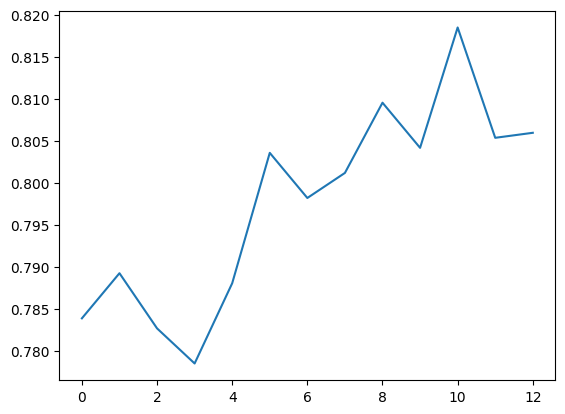

In [89]:
plt.plot([i for i in range(len(reports_neg_con_ful))], [report['accuracy'] for report in reports_neg_con_ful])